In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.constants as sc

In [11]:
wvl = []
n = []
k = []
with open("Rakic-LD.csv") as file:
    csvfile = csv.reader(file)
    for i,line in enumerate(csvfile):
        if i>0 and i<1001:
            WVL,N = [float(l) for l in line]
            if WVL>0.2 and WVL<0.4:
                wvl.append(WVL)
                n.append(N)
        elif i>1002 and i<2002:
            WVL,K = [float(l) for l in line]
            if WVL>0.2 and WVL<0.4:
                k.append(K)
wvl = np.array(wvl)
n = np.array(n)
k = np.array(k)

In [12]:
eps_real = ((n+1j*k)**2).real
eps_imag = ((n+1j*k)**2).imag

Text(209.743,0.5,'eps.imag')

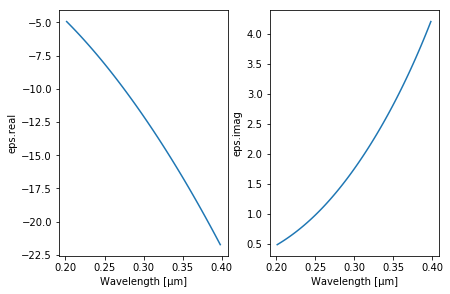

In [13]:
fig, axs = plt.subplots(1,2,facecolor='white')
plt.tight_layout()
axs[0].plot(wvl,eps_real)
axs[1].plot(wvl,eps_imag)
axs[0].set_xlabel("Wavelength [µm]")
axs[0].set_ylabel("eps.real")
axs[1].set_xlabel("Wavelength [µm]")
axs[1].set_ylabel("eps.imag")

In [29]:
deltaE_Lorentz = []
omegaP_Lorentz = []
deltaP_Lorentz = []
omegaQ_Drude = [2*sc.pi*3700E12]
gammaQ_Drude = [8E14]
eps_inf = 2

In [30]:
eps_fit_real = []
eps_fit_imag = []
for l in wvl:
    o = 2*sc.pi*sc.c/(1E-6*l)
    efr, efi = eps_inf,0
    for i in range(len(deltaE_Lorentz)):
        tmp = deltaE_Lorentz[i]*omegaP_Lorentz[i]**2/(omegaP_Lorentz[i]**2+2j*o*deltaE_Lorentz[i]-o**2)
        efr += tmp.real
        efi += tmp.imag
    for i in range(len(omegaQ_Drude)):
        tmp = -omegaQ_Drude[i]**2/(o**2 + 1j*o*gammaQ_Drude[i])
        efr += tmp.real
        efi += tmp.imag
    eps_fit_real.append(efr)
    eps_fit_imag.append(efi)

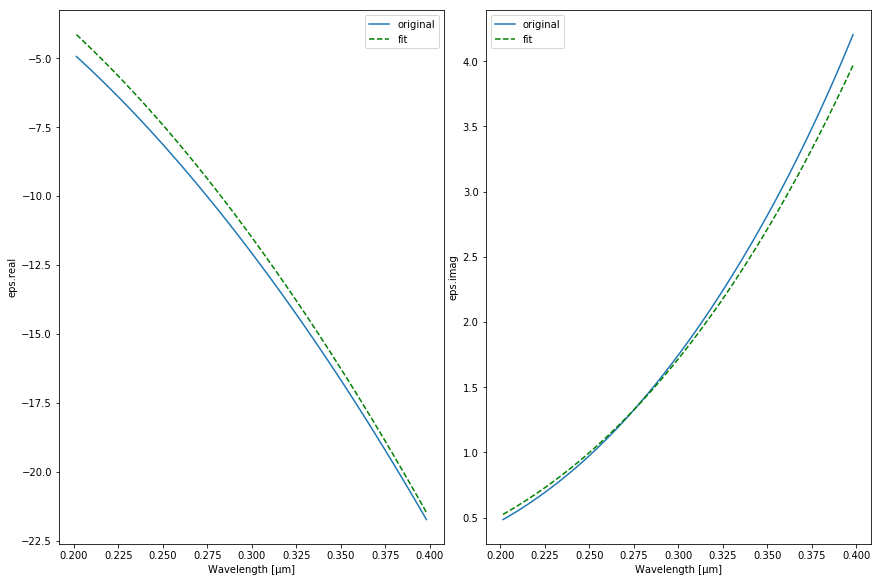

In [31]:
fig, axs = plt.subplots(1,2,facecolor='white', figsize=(12,8))
plt.tight_layout()
axs[0].plot(wvl,eps_real, label="original")
axs[0].plot(wvl,eps_fit_real, "g--", label="fit")
axs[1].plot(wvl,eps_imag, label="original")
axs[1].plot(wvl,eps_fit_imag, "g--", label="fit")
axs[0].set_xlabel("Wavelength [µm]")
axs[0].set_ylabel("eps.real")
axs[1].set_xlabel("Wavelength [µm]")
axs[1].set_ylabel("eps.imag")
axs[0].legend(loc="best")
axs[1].legend(loc="best")